In [1]:
import sys; sys.path.append('..')
from os import path
from random import choice
from graph import Graph, ReaderORLibrary
from graph.steiner import (prunning_mst, shortest_path,
                            shortest_path_origin_prim,
                            prunning_kruskal_mst,
                            shortest_path_with_origin)

from graph.util import is_steiner_tree, has_cycle
from graph.algorithms import kruskal, prim

In [2]:
from matplotlib import pyplot as plt
from draw import draw_radial, draw_common

In [3]:
from operator import attrgetter

In [4]:
from pxcrossover import compose, connected

As heurísticas para o STPG dão uma medida de aproximação sobre a qualidade da solução próxima que encontram. 
Esta medida pode ser de alguma forma utilizada para verificar quando uma heurísticas pode ser utilizada para determinada instância de forma que o operador de cruzamento seja eficiênte?

In [7]:
file = path.join('..', 'datasets','ORLibrary', 'steinb18.txt')

path.exists(file)

True

In [8]:
reader = ReaderORLibrary()

stpg = reader.parser(file)

In [9]:
type(stpg.graph)

graph.graph.Graph

In [10]:
print(stpg.terminals)

{5, 9, 11, 16, 17, 18, 19, 20, 21, 23, 25, 27, 33, 34, 36, 38, 40, 43, 44, 46, 49, 50, 51, 52, 54, 55, 57, 58, 59, 60, 61, 62, 66, 67, 69, 70, 79, 81, 82, 83, 84, 85, 88, 89, 91, 93, 94, 95, 97, 100}


In [11]:
help(prunning_mst)

Help on function prunning_mst in module graph.steiner:

prunning_mst(graph, start, terminals)
    Parameters:
        graph : Graph
            Base graph to compute the Steiner tree
        start : Node
            Where is to start Prim's algorithm
        terminals : Set
            Terminals Nodes from the STPG instance
    
    Return:
        prunning : A Steiner Tree
        total : Numeric - total cost of the tree
    
    Notes:
        Determina a MST do grafo por meio do algoritmo de Prim.
        Realiza a poda considerando os nós terminais como os nós folhas até a raiz <start>
        Se <start> for um vértice não terminal, o laço <while> verifica se <start> é um vértice folha da árvore resultande.
        Em caso afirmativo realiza uma poda iterativa a partir desse vértice para garantir que a árvore resultante seja
        uma árvore de Steiner.
        Resulta sempre na mesma árvore para qualquer vértice <start> considerado.



In [12]:
help(is_steiner_tree)

Help on function is_steiner_tree in module graph.util:

is_steiner_tree(subgraph: graph.graph.Graph, STPG: graph.reader.SteinerTreeProblem)
    Check if the graph passed is a Steiner Tree.
    
    Parameters:
        subgraph : Graph
            represent the partial solution to be tested
        STPG : SteinerTreeProblem
            the problem instance itself
    
    Returns:
        bool: True or False
        dict : status' test
    
    Note: A Steiner Tree might not be a Minimal Steiner Tree.



In [13]:
%%time

tt = choice(list(stpg.terminals))

aa, a_cost = prunning_mst(stpg.graph, tt, stpg.terminals)

a_cost

Wall time: 9.99 ms


225

In [14]:
is_steiner_tree(aa,stpg)

(True,
 {'has_cycle': False,
  'all_terminals_in': True,
  'all_leaves_are_terminals': True,
  'all_edges_are_reliable': True,
  'graph_is_connected': True})

In [15]:
%%time 

tt = choice(list(stpg.terminals))
terminals = set(stpg.terminals)

cc = prunning_kruskal_mst(stpg.graph, terminals)

is_steiner_tree(cc, stpg)

Wall time: 5 ms


(True,
 {'has_cycle': False,
  'all_terminals_in': True,
  'all_leaves_are_terminals': True,
  'all_edges_are_reliable': True,
  'graph_is_connected': True})

In [16]:
non_terminal = [ v for v in range(1, stpg.nro_nodes + 1) if v not in stpg.terminals]
# print(non_terminal)

In [17]:
v = choice(non_terminal)

print("vertice ", v)

bb, b_cost = prunning_mst(stpg.graph, v, stpg.terminals)

b_cost

vertice  47


227

In [18]:
is_steiner_tree(bb, stpg)

(True,
 {'has_cycle': False,
  'all_terminals_in': True,
  'all_leaves_are_terminals': True,
  'all_edges_are_reliable': True,
  'graph_is_connected': True})

In [19]:
v in bb

False

In [20]:
help(compose)

Help on function compose in module pxcrossover:

compose(red: graph.graph.Graph, blue: graph.graph.Graph)
    Parameters:
    ----------
        red, blue : Graph
    
    Return:
    -------
        g_union, g_common, g_star : Graph



In [21]:
g_union, g_common, g_star = compose(aa, bb)

In [22]:
help(connected)

Help on function connected in module pxcrossover:

connected(g_union: graph.graph.Graph, red: graph.graph.Graph, blue: graph.graph.Graph, start: 'node')



In [23]:
%%time

first, second, previous = connected(g_union, aa, bb, tt)

Wall time: 999 µs


In [24]:
len(first)

2

In [25]:
len(second)

2

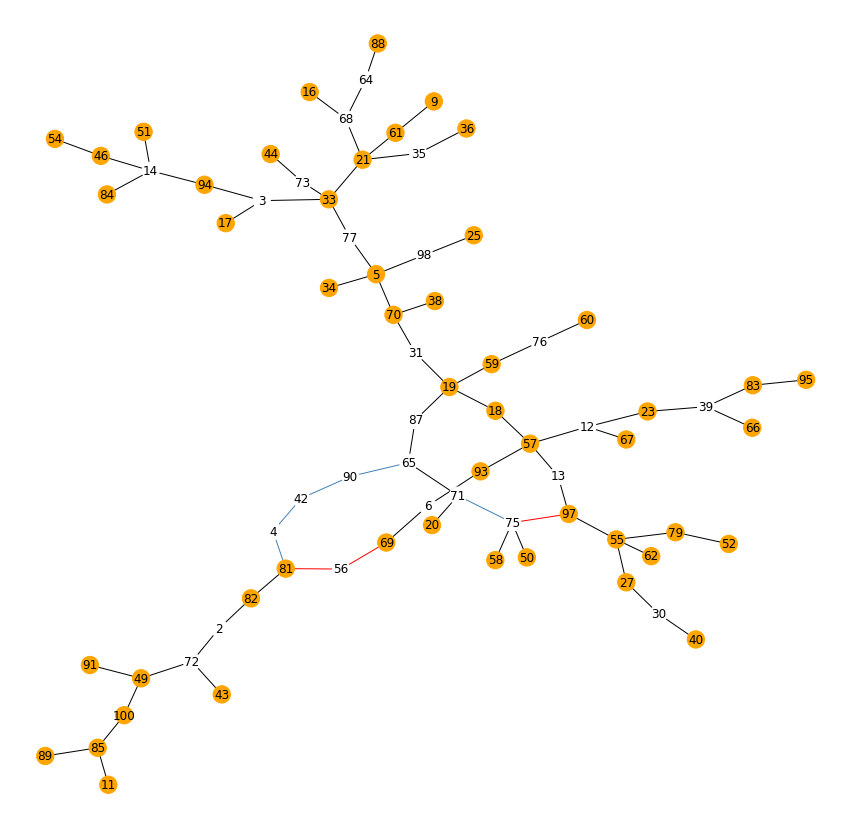

In [26]:
plt.figure(figsize=(15,15))

draw_common(g_union, stpg.terminals, aa, bb)

In [27]:
# os vértices diferentes possuem os mesmos pais
def test_2(right, left, commonset):
    
    diff_right = right.portal - left.portal
    diff_left  = left.portal - right.portal
    
    portal_right = set(map(lambda x : commonset.find(x), diff_right))
    portal_left  = set(map(lambda x : commonset.find(x), diff_left))
    
    return portal_right == portal_left

In [28]:
first

In [29]:
second

In [30]:
matches = dict()

for component in first:
    ss = frozenset(previous.find(v) for v in component.portal)
    matches[ss] = [component]

In [31]:
non_second = list()

for component in second:
    ss = frozenset(previous.find(v) for v in component.portal)
    if ss in matches:
        matches[ss].append(component)
    else:
        non_second.append(component)

In [32]:
component.edges

{71: None, 75: 71}

In [33]:
len(matches)

2

In [34]:
matches

{frozenset({18, 50}): [<pxcrossover.Component at 0x25a3a9a5610>,
 frozenset({18, 82}): [<pxcrossover.Component at 0x25a3a9a5670>,
  <pxcrossover.Component at 0x25a3a9a56d0>]}

In [35]:
get_cost = attrgetter('cost')

success = 0
fail = 0

non_first = list()
how_many = list()

minimum_cost = list()

for key, components in matches.items():
    if len(components) >= 2:
        how_many.append(len(components))
        success += 1 
        minimum_cost.append(min(components, key=get_cost))
    else:
        print(len(components), end='\t')
        non_first.append(components.pop())
        fail += 1

In [36]:
if len(minimum_cost) < 7:
    for c in minimum_cost: 
        print(c, c.cost, c.portal, stpg.graph.has_edge(*c.portal))

<pxcrossover.Component object at 0x0000025A3A9A5610> 1 {97, 75} True
<pxcrossover.Component object at 0x0000025A3A9A5670> 5 {81, 69} False


In [37]:
len(minimum_cost)

2

In [38]:
get_cost(component)

1

In [39]:
how_many

[2, 2]

In [40]:
success

2

In [41]:
fail

0

In [42]:
len(non_second)

0

In [43]:
len(non_first)

0

In [44]:
total_first = 0
for c in non_first:
#     print(c, c.cost, c.portal, stpg.graph.has_edge(*c.portal))
    total_first += c.cost

In [45]:
total_second = 0
for c in non_second: 
#     print(c, c.cost, c.portal, stpg.graph.has_edge(*c.portal))
    total_second += c.cost

In [46]:
print(total_first)
print(total_second)

0
0


In [47]:
if total_second < total_first:
    selected = non_second
else:
    selected = non_first

In [48]:
for component in minimum_cost:
    print(component.cost)
        
    print("------")

1
------
5
------


In [49]:
minimum_cost

In [50]:
for component in minimum_cost:
    for v, u in component.edges.items():
        if u is None:
            continue
        w = stpg.graph.W(v,u)
        g_common.add_edge(v,u,weight=w)

In [51]:
is_steiner_tree(g_common, stpg)

(True,
 {'has_cycle': False,
  'all_terminals_in': True,
  'all_leaves_are_terminals': True,
  'all_edges_are_reliable': True,
  'graph_is_connected': True})

In [52]:
len(selected)

0

In [53]:
for component in selected:
    for v, u in component.edges.items():
        if u is None:
            continue
        w = stpg.graph.W(v,u)
        g_common.add_edge(v,u,weight=w)

In [54]:
is_steiner_tree(g_common, stpg)

(True,
 {'has_cycle': False,
  'all_terminals_in': True,
  'all_leaves_are_terminals': True,
  'all_edges_are_reliable': True,
  'graph_is_connected': True})

In [55]:
# g_common.edges

In [56]:
from graph.util import gg_total_weight

In [57]:
gg_total_weight(g_common)

225

In [58]:
gg_total_weight(aa)

225

In [59]:
gg_total_weight(bb)

227